In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. What is the most crowded profession in 2022

In [38]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,Aug 2022,Present,9.0,Egypt,teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,Nov 2020,Jan 2021,3.0,NaN,full-stack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,Jul 2019,NaN,1.0,"Cairo, Egypt",software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,Aug 2018,NaN,1.0,"Cairo, Egypt",software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,Jan 2022,Present,16.0,"Basel, Switzerland",software


In [39]:
# get current jobs
df = df[df['To'] == 'Present']

In [40]:
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]

<AxesSubplot:>

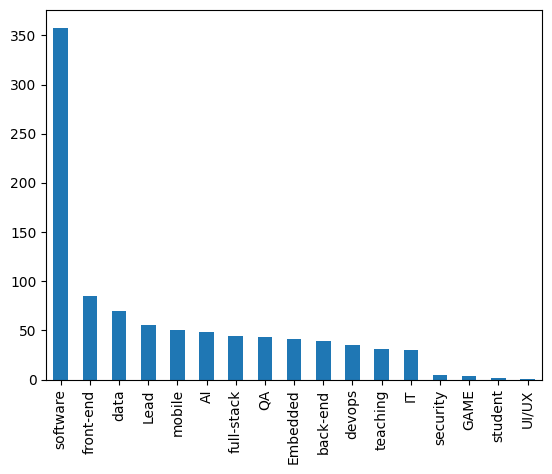

In [41]:
df['title_tag'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [42]:
df['title_tag'].value_counts().sort_values(ascending=False)

software      358
front-end      85
data           70
Lead           55
mobile         50
AI             48
full-stack     44
QA             43
Embedded       41
back-end       39
devops         35
teaching       31
IT             30
security        5
GAME            4
student         2
UI/UX           1
Name: title_tag, dtype: int64

### 2. What is the percentage of turnover in the market?

In [3]:
df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
# filter out internship
df = df[(df['title_tag'] != 'internship') & (df['EmploymentType'] != 'Internship')]
df.head(2)

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,Aug 2022,Present,9.0,Egypt,teaching
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,Jan 2022,Present,16.0,"Basel, Switzerland",software


In [76]:
all_group = df.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
all_group['turnover_rate'] = all_group['Duration'] / all_group['Company']

print(f"Average turnover rate: {all_group['turnover_rate'].mean():.2f} months with std: {all_group['turnover_rate'].std():.2f} months")

Average turnover rate: 21.34 months with std: 16.66 months


### Hypothesis: AI engineers has higher turn over rates.

In [79]:
ai_data = df[df['title_tag'] == 'AI']
other_data = df[df['title_tag'] != 'AI']

In [80]:
ai_group = ai_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
ai_group['turnover_rate'] = ai_group['Duration'] / ai_group['Company']

In [87]:
print(f"Average turnover rate for AI: {ai_group['turnover_rate'].mean():.2f} months with std: {front_group['turnover_rate'].std():.2f} months")

Average turnover rate for AI: 16.21 months with std: 22.78 months


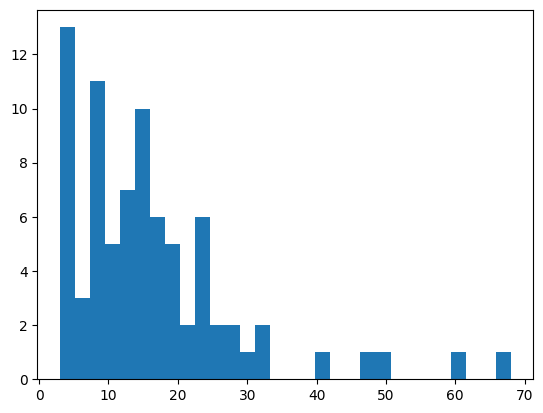

In [88]:
# plot histogram
plt.hist(ai_group['turnover_rate'], bins=30)
plt.show()

In [83]:
other_group = other_data.groupby('User')[['Company', 'Duration']].agg({'Company': lambda x: x.nunique(), 'Duration': 'sum'})
other_group['turnover_rate'] = other_group['Duration'] / other_group['Company']

In [84]:
print(f"Average turnover rate for other: {other_group['turnover_rate'].mean():.2f} months with std: {other_group['turnover_rate'].std():.2f} months")

Average turnover rate for other: 21.33 months with std: 16.78 months


In [86]:
# implement t-test
from scipy import stats
stats.ttest_ind(ai_group['turnover_rate'], other_group['turnover_rate'])

Ttest_indResult(statistic=-2.65538024097238, pvalue=0.008064135904104427)

In [89]:
# implement mann-whitney test
stats.mannwhitneyu(ai_group['turnover_rate'], other_group['turnover_rate'])

MannwhitneyuResult(statistic=25035.5, pvalue=0.000872124913178919)

Mann-Whitney U Test: The Mann-Whitney U test is a non-parametric test that is used to compare the medians of two groups. It is used when the data are not normally distributed and the sample sizes are small. The test does not assume any particular distribution of the data.